In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Create a directory to save the CIFAR-10 dataset
save_dir = '/content/drive/MyDrive/cifar10_data'
os.makedirs(save_dir, exist_ok=True)

In [6]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Save the datasets to numpy files
np.save(os.path.join(save_dir, 'x_train.npy'), x_train)
np.save(os.path.join(save_dir, 'y_train.npy'), y_train)
np.save(os.path.join(save_dir, 'x_test.npy'), x_test)
np.save(os.path.join(save_dir, 'y_test.npy'), y_test)

print(f"CIFAR-10 dataset saved at {save_dir}")

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
CIFAR-10 dataset saved at /content/drive/MyDrive/cifar10_data


In [7]:
# Build CNN model
def create_cnn_model():
    model = models.Sequential()

    # Stacked Convolution layer
    model.add(layers.Conv2D(48, (3, 3), padding='same', input_shape=(32, 32, 3),activation = 'relu'))

    model.add(layers.Conv2D(48, (3, 3),activation = 'relu'))

    # Max Pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Dropout for regularization
    model.add(layers.Dropout(0.25))

    # Stacked Convolution layer
    model.add(layers.Conv2D(96, (3, 3), padding='same',activation = 'relu'))

    model.add(layers.Conv2D(96, (3, 3),activation = 'relu'))

    # Max Pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Dropout for regularization
    model.add(layers.Dropout(0.25))

    # Stacked Convolution layer
    model.add(layers.Conv2D(192, (3, 3), padding='same',activation = 'relu'))

    model.add(layers.Conv2D(192, (3, 3),activation = 'relu'))

    # Max Pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Dropout(0.25))

    # Flattening
    model.add(layers.Flatten())

    # Fully-connected layer
    model.add(layers.Dense(units = 512, activation = 'relu'))

    # Dropout for regularization
    model.add(layers.Dropout(0.5))

    # Fully-connected layer
    model.add(layers.Dense(units = 256, activation = 'relu'))

    # Dropout for regularization
    model.add(layers.Dropout(0.5))

    # Output Fully-connected layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [8]:
# Create the model
model = create_cnn_model()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 48)     │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 96)     │        41,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 192)      │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,172,410 (4.47 MB)

 Trainable params: 1,172,410 (4.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.2043 - loss: 2.0757 - val_accuracy: 0.4042 - val_loss: 1.6116
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4416 - loss: 1.5150 - val_accuracy: 0.5171 - val_loss: 1.3194
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5283 - loss: 1.2964 - val_accuracy: 0.5958 - val_loss: 1.1283
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5783 - loss: 1.1757 - val_accuracy: 0.6507 - val_loss: 0.9984
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6226 - loss: 1.0749 - val_accuracy: 0.6548 - val_loss: 0.9720
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6433 - loss: 1.0156 - val_accuracy: 0.6960 - val_loss: 0.8728
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6652 - loss: 0.9500 - val_accuracy: 0.7114 - val_loss: 0.8320
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6899 - loss: 0.9046 - val_

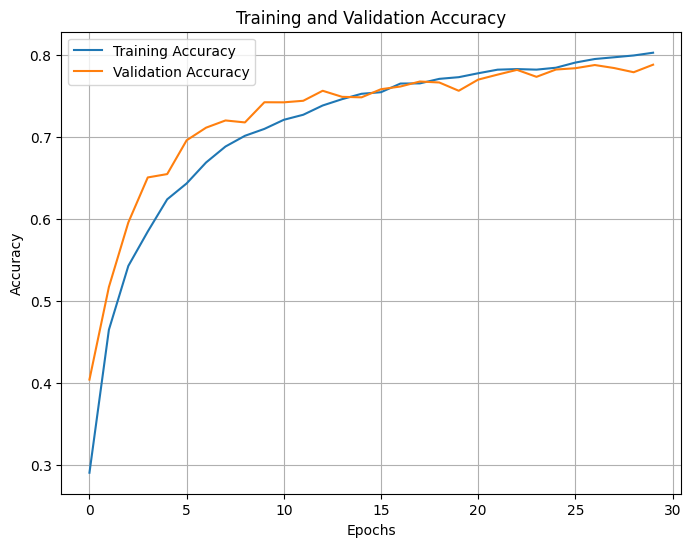

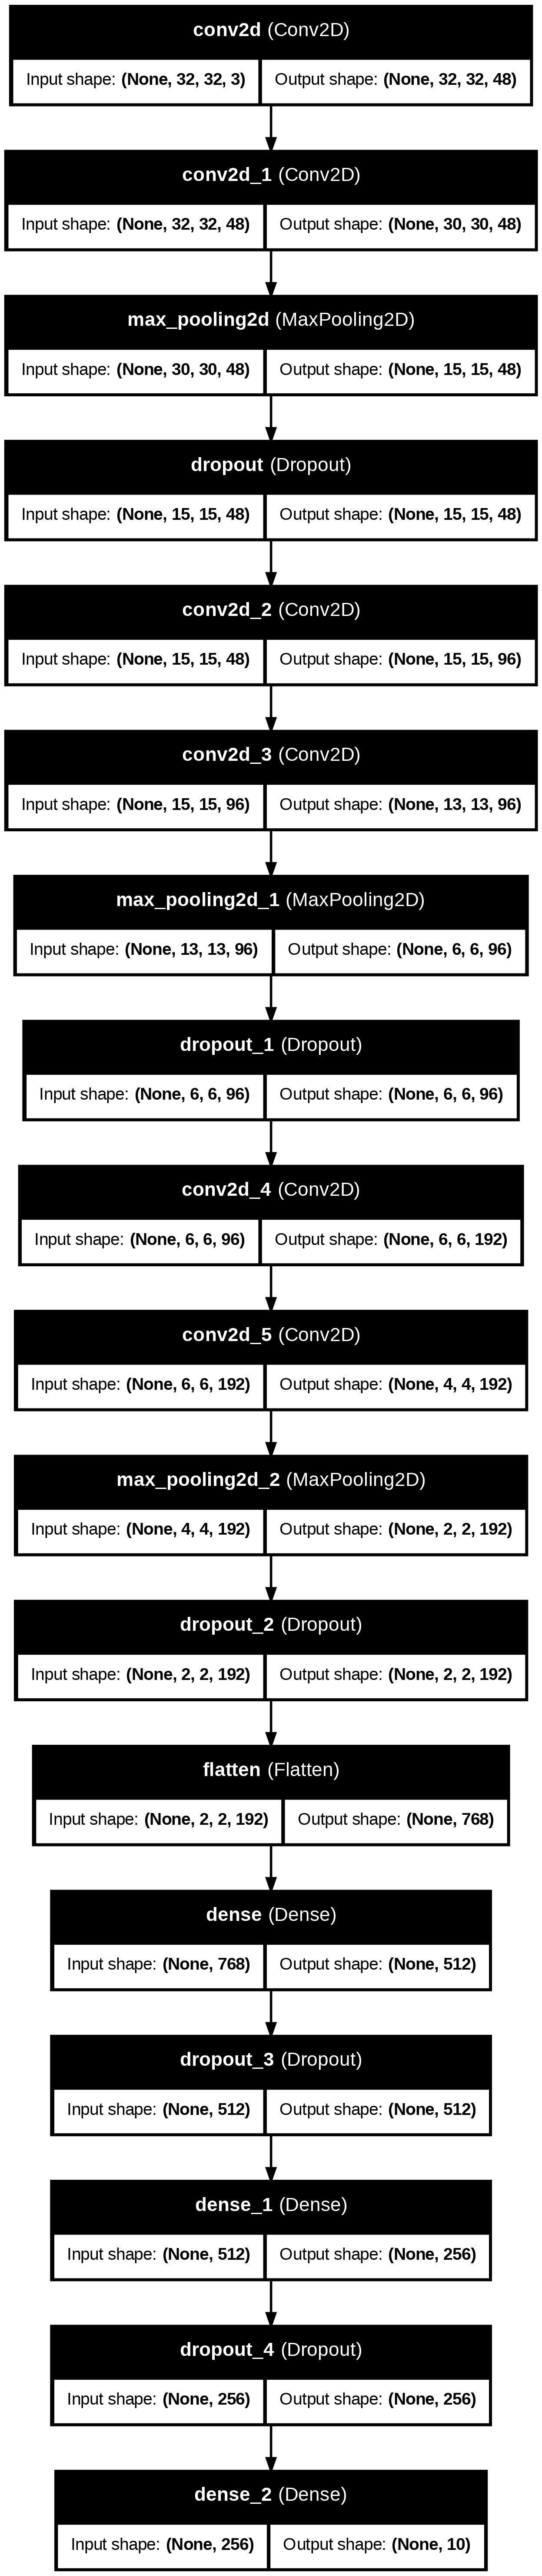

In [9]:
# Plot accuracy vs validation accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/accuracy_plot.png')
plt.show()

# Save the model architecture visualization
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/cnn_architecture.png', show_shapes=True, show_layer_names=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


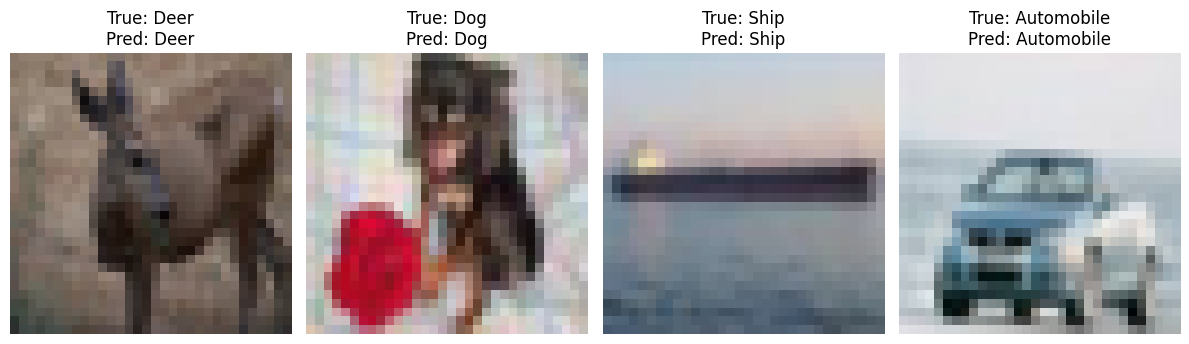

In [10]:
# Predict and visualize 4 random test samples

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

random_indices = random.sample(range(len(x_test)), 4)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

predictions = model.predict(sample_images)

plt.figure(figsize=(12,6))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 4, i+1)
    plt.imshow(sample_images[i])
    true_label = class_names[np.argmax(sample_labels[i])]
    predicted_label = class_names[np.argmax(predictions[i])]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
